In [14]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [15]:
import importlib
import sys
sys.path.append('../')
from Utils.perturbationsnew import RBPIndividual, RBPIndividualNew1, RBPIndividualNew2, zeroPerturb, noisePerturb, blurPerturb
from Utils.models import *
from Utils.data import perturb, generateSynthetic, generateSyntheticPerturbReal

print(sys.path)


['/Users/gali/anaconda3/envs/LIMEtf/lib/python310.zip', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/lib-dynload', '', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages/setuptools/_vendor', '../', '../', '../']


## Test Realism of Generated Samples 

### Generate synthetic data 

In [16]:
perturbed_datasets = generateSyntheticPerturbReal(500)
def get_list_shape(lst):
    if isinstance(lst, list):
        return [len(lst)] + get_list_shape(lst[0]) if lst else []
    else:
        return []


### Create CNN model and train on each perturbed dataset 

In [17]:
datasets_training_loss = []
for dataset in perturbed_datasets: 
    model = make_CNN_model(dataset[0].shape[1:])
    trained_model, history = train_CNN_model(model, dataset[0], dataset[1], epochs=100, batch_size=32)
    datasets_training_loss.append(history.history['val_loss'])

Epoch 1/100
25/25 [==============================] - 1s 31ms/step - loss: 0.7069 - sparse_categorical_accuracy: 0.5063 - val_loss: 0.6934 - val_sparse_categorical_accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 1s 27ms/step - loss: 0.6906 - sparse_categorical_accuracy: 0.5275 - val_loss: 0.6929 - val_sparse_categorical_accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 1s 27ms/step - loss: 0.6883 - sparse_categorical_accuracy: 0.5512 - val_loss: 0.6940 - val_sparse_categorical_accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 1s 27ms/step - loss: 0.6873 - sparse_categorical_accuracy: 0.5475 - val_loss: 0.6984 - val_sparse_categorical_accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 1s 28ms/step - loss: 0.6861 - sparse_categorical_accuracy: 0.5625 - val_loss: 0.7061 - val_sparse_categorical_accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 1s 27ms/step - loss: 0.6863 - sparse_categorica

### Visualise loss curves of model training on perturbed datasets

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


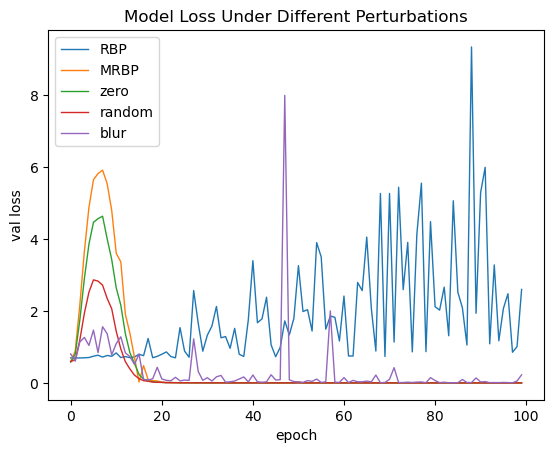

In [18]:

for i in range(5):
    plt.plot(datasets_training_loss[i], linewidth=1)
plt.title('Model Loss Under Different Perturbations')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.legend(['RBP','MRBP','zero','random','blur'], loc='upper left')
plt.savefig("realistic_perturb.eps", format='eps')
plt.show()